In [9]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [10]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Software_bar(Softwares_counts, context_label="Softwares", bar_color="royalblue", max_y_text_pos=18):
    Softwares, counts = zip(*Softwares_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(Softwares, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Softwares')
    plt.tight_layout()
    plt.show()

def plot_Software_wordcloud(Software_counter, title="WordCloud of Unified Softwares"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Software_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Software_mapping = {}

def reverse_map_Software(Software, mapping):
    for main_Software, variations in mapping.items():
        if Software.lower() == main_Software.lower() or Software.lower() in variations or main_Software.lower() in Software.lower():
            return main_Software
    else:
        return Software

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Software Frequency Comparison", n=10):
    combined_Softwares = (counts_a + counts_b).most_common(n)
    Softwares = [k for k, _ in combined_Softwares]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Softwares],
        label_b: [counts_b.get(k, 0) for k in Softwares]
    }, index=Softwares)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Software in enumerate(df.index):
        val_a = df.loc[Software, label_a]
        val_b = df.loc[Software, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Software")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

software_mapping = {
    'gaussian': ['gaussian 09', 'gaussian09', 'gaussian 03', 'gaussian 98', 'gaussian03', 'gaussian98', 'gaussian', 'gaussian16', 'gaussian 03w', 'gaussian 16'],
    'gamess': ['gamess'],
    'gromacs': ['gromacs'],
    'gromos': ['gromos'],
    'mopac': ['mopac'],
    'am1': ['am1'],
    'quantum espresso': ['quantum espresso'],
    'siesta':['siesta'],
    'zindo': ['zindo'],
    'orca': ['orca'],
    'vasp': ['vasp'],
    'molpro': ['molpro'],
    'dalton':['dalton'],
    'autodock vina': ['autodock vina'],
    'dice': ['dice'],
    'pm3': ['pm3'],
    'Avogadro': ['Avogadro'],
    'amber': ['amber'],
    'lammps': ['lammps'],
    'hyperchem': ['hyperchem'],
    'aimall': ['aimall'],
    'thor': ['thor'],
    'cp2k': ['cp2k'],
    'nwchem': ['nwchem'],
    'turbomole': ['turbomole'],
    'charmm': ['charmm'],
    'openmm': ['openmm'],
    'materials studio': ['materials studio'],
    'chemcraft': ['chemcraft'],
    'vmd': ['vmd'],
    'pymol': ['pymol'],
    'packmol': ['packmol'],
    'namd': ['namd'],
    'qchem': ['qchem'],
    'adf': ['adf'],
    'fdtd solutions': ['fdtd solutions'],
    'comsol multiphysics': ['comsol multiphysics'],
    'molcas': ['molcas'],
    'xtb': ['xtb'],
    'gaussview ':['gaussview'],
    'mndo':['mndo'],
    'mrsdci':['multi reference singles and doubles ci'],
    'crystal':['crystal'],
    'modeller': ['modeller', 'modeler'],
    'metaboanalyst': ['metaboanalyst'],
    'fhi-aims': ['fhi-aims', 'fhi aims'],
    'imagej': ['imagej'],
    'statistica': ['statistica', 'statistica 10'],
    'gold': ['gold', 'ccdc gold'],
    'matlab': ['matlab'],
    'python': ['python'],
    'sisvar': ['sisvar'],
    'mzmine': ['mzmine', 'mzmine2', 'mzmine 2'],
    'gnps': ['gnps', 'global natural products social molecular networking'],
    'bioconductor': ['bioconductor'],
    'scikit-learn': ['scikit-learn', 'sklearn'],
    'tensorflow': ['tensorflow'],
    'keras': ['keras'],
    'pytorch': ['pytorch'],
    'juliaset': ['julia'],
    'openbabel': ['openbabel'],
    'chemdraw': ['chemdraw'],
    'origin': ['origin', 'originpro'],
    'excel': ['excel', 'microsoft excel'],
    'igraph': ['igraph'],
    'cytoscape': ['cytoscape'],
    'igraph': ['igraph'],
    'knime': ['knime'],
    'desmond': ['desmond'],
    'ligprep': ['ligprep'],
    'maestro': ['maestro'],
    'schrodinger': ['schrodinger']
}
  

Unbiased counting

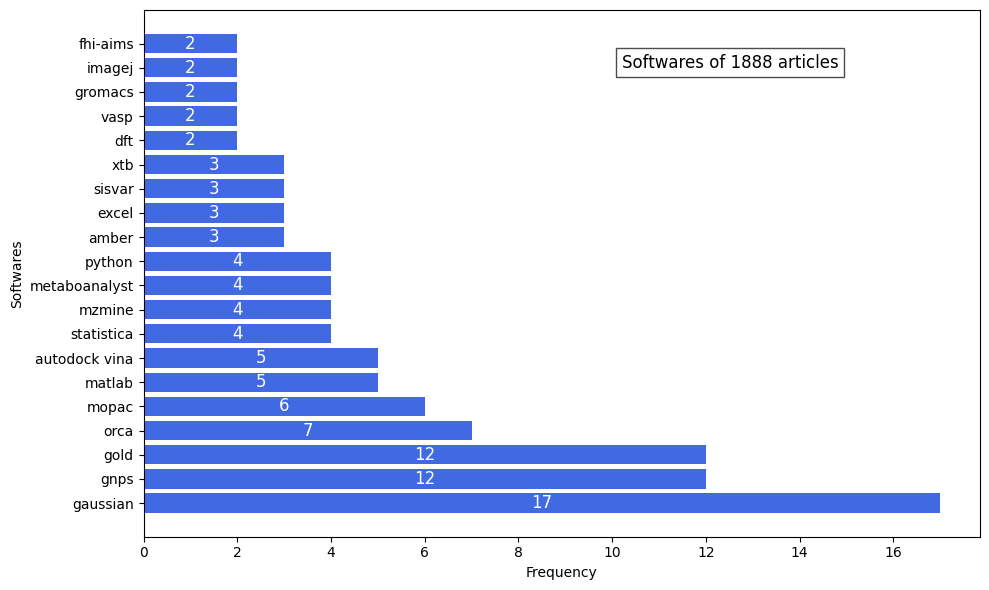

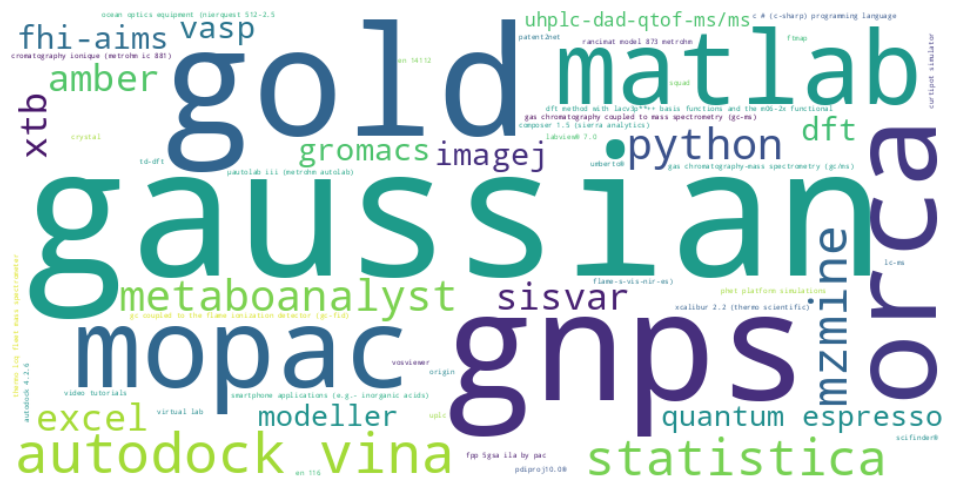

[('gaussian', 17), ('gnps', 12), ('gold', 12), ('orca', 7), ('mopac', 6), ('matlab', 5), ('autodock vina', 5), ('statistica', 4), ('mzmine', 4), ('metaboanalyst', 4), ('python', 4), ('amber', 3), ('excel', 3), ('sisvar', 3), ('xtb', 3), ('dft', 2), ('vasp', 2), ('gromacs', 2), ('imagej', 2), ('fhi-aims', 2)]


In [ ]:
Softwares = data['Software Used'].dropna()

all_Softwares = (
    Softwares
    .str.split(r'[;,]')
    .explode()
    .str.strip()
    .str.lower()
    .str.replace("'", "")
)

all_Softwares = all_Softwares[all_Softwares != ""]

mapped_Softwares = all_Softwares.apply(lambda x: reverse_map_Software(x, software_mapping))
mapped_Softwares = mapped_Softwares[mapped_Softwares != ""]  

Software_counts_geral = Counter(mapped_Softwares)
top_Softwares = Software_counts_geral.most_common(20)

Softwares, counts = zip(*top_Softwares)

plot_Software_bar(top_Softwares, context_label="Softwares of 1888 articles")
plot_Software_wordcloud(Software_counts_geral)

print(top_Softwares)


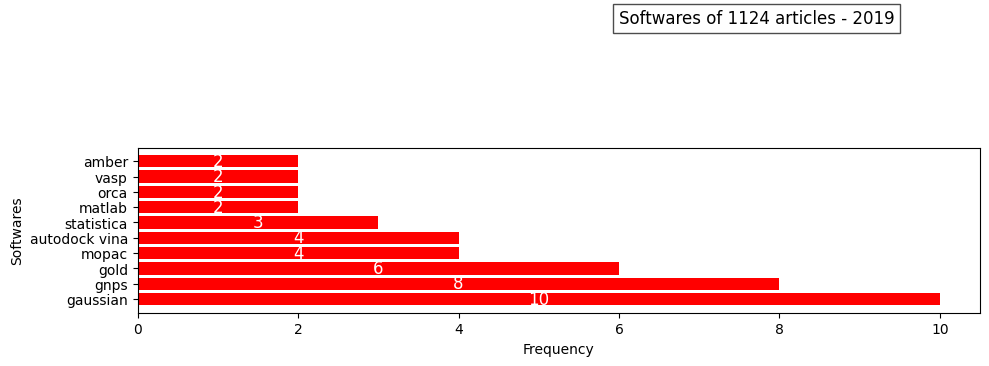

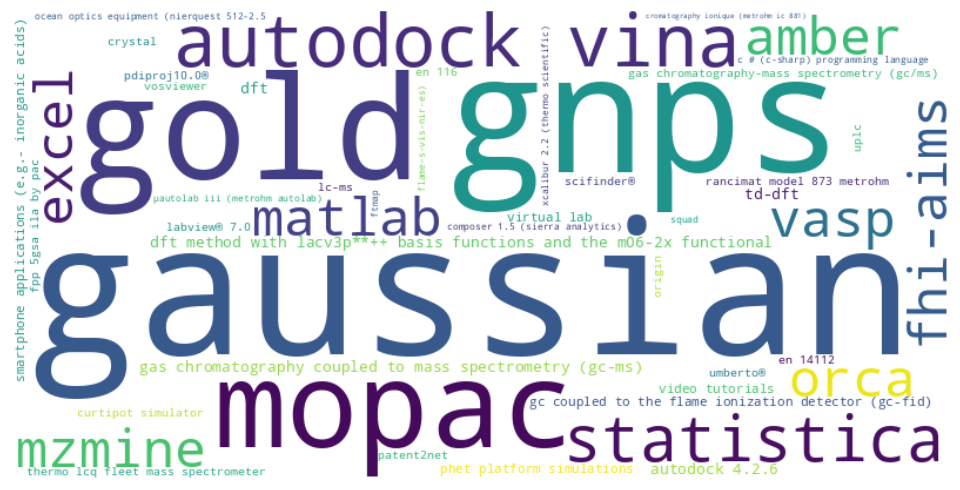

In [ ]:
data_2019 = data[data['Year'] == 2019]

Softwares = data_2019['Software Used'].dropna()
all_Softwares = (Softwares.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Softwares = all_Softwares[all_Softwares != ""]

mapped_Softwares = all_Softwares.apply(lambda x: reverse_map_Software(x, software_mapping))
Software_counts_2019 = Counter(mapped_Softwares)
top_Softwares = Software_counts_2019.most_common(10)
Softwares, counts = zip(*top_Softwares)

plot_Software_bar(top_Softwares, context_label="Softwares of 1124 articles - 2019", bar_color="red")
plot_Software_wordcloud(Software_counts_2019)


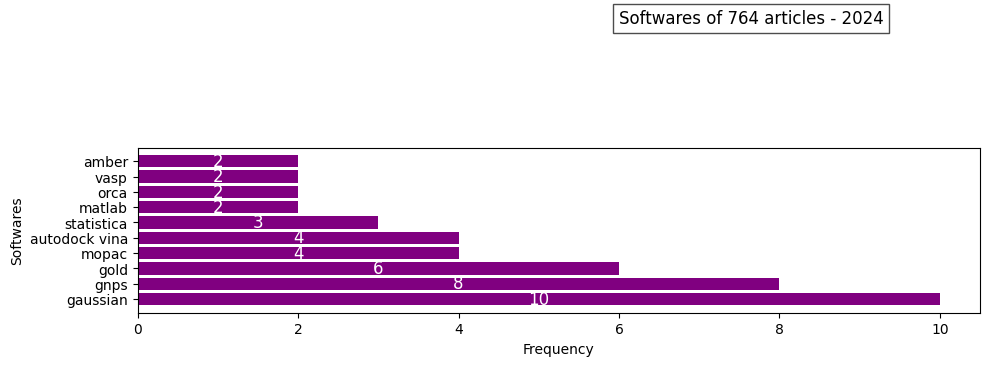

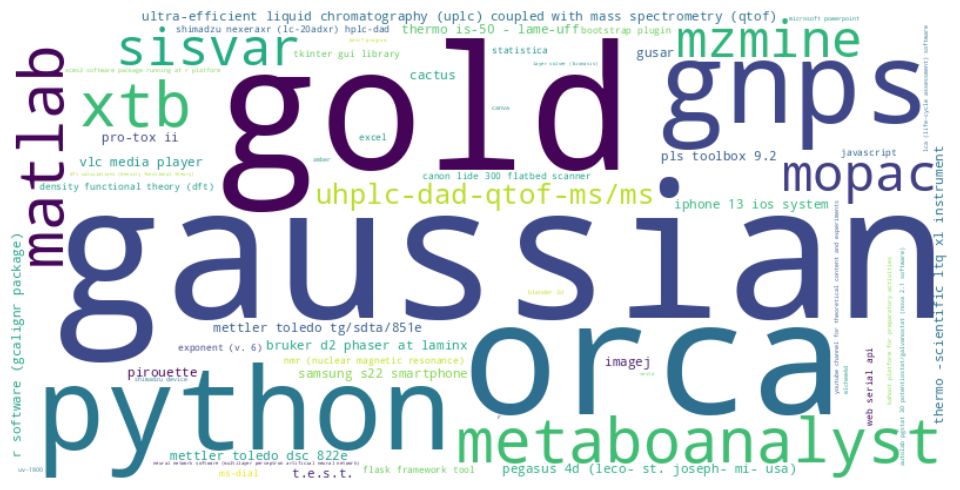

In [ ]:
data_2019 = data[data['Year'] == 2024]

Softwares = data_2019['Software Used'].dropna()
all_Softwares = (Softwares.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Softwares = all_Softwares[all_Softwares != ""]
mapped_Softwares = all_Softwares.apply(lambda x: reverse_map_Software(x, software_mapping))
Software_counts_2024 = Counter(mapped_Softwares)
top_Softwares = Software_counts_2019.most_common(10)
Softwares, counts = zip(*top_Softwares)

plot_Software_bar(top_Softwares, context_label="Softwares of 764 articles - 2024", bar_color="purple")
plot_Software_wordcloud(Software_counts_2024)

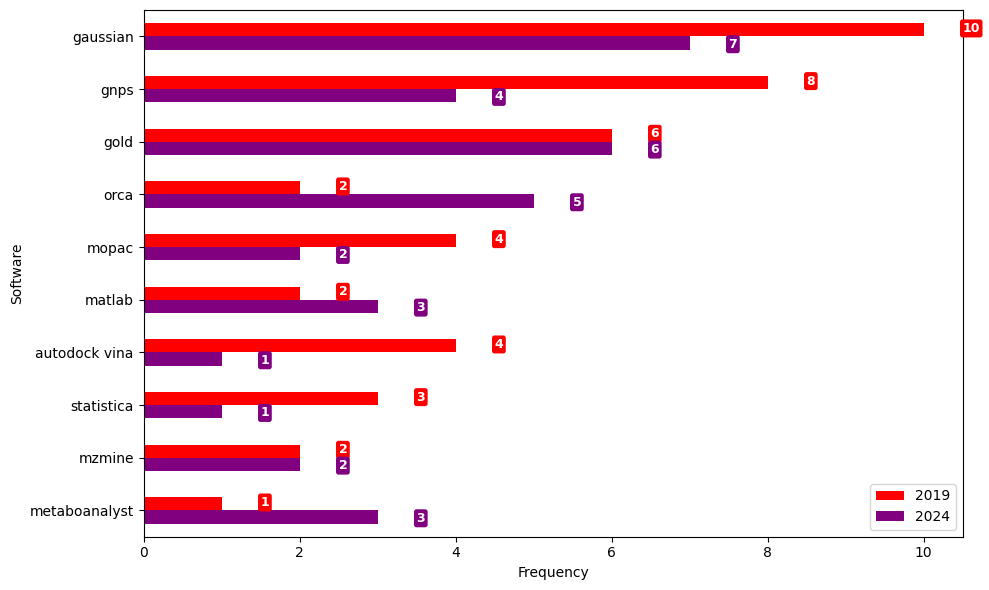

In [ ]:
plot_comparison_bar(
    counts_a=Software_counts_2019,
    counts_b=Software_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Software Frequency Comparison: 2019 vs 2024"
)
